## Yelp Rating Regression Predictor
Goal: Use a Multiple Linear Regression model to investigate what factors affect a restaurant's Yelp rating

In [13]:
import pandas as pd

businesses = pd.read_json('yelp_business.json', lines=True)
reviews = pd.read_json('yelp_review.json', lines=True)
users = pd.read_json('yelp_user.json', lines=True)
checkins = pd.read_json('yelp_checkin.json', lines=True)
tips = pd.read_json('yelp_tip.json', lines=True)
photos = pd.read_json('yelp_photo.json', lines=True)

In [4]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

### Dataset Inspection

#### Businesses

In [7]:
businesses.head(1)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1


#### Reviews

In [23]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [24]:
reviews.describe()

,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,1175.501021,596.463567,0.554935,15.617091,18.495973,43.515279
std,659.377141,267.858613,0.345654,109.837911,82.337083,170.623422
min,71.555556,62.400000,-0.995200,0.000000,0.000000,0.000000
25%,714.666667,421.750000,0.373775,0.000000,1.000000,4.000000
50%,1075.741627,546.000000,0.641700,3.000000,3.000000,11.000000
75%,1498.000000,708.561475,0.819559,10.000000,11.000000,34.000000
max,4727.333333,4229.000000,0.996575,36822.000000,6572.000000,38357.000000


#### Users

In [9]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


#### Checkins

In [10]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


#### Tips

In [11]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


#### Photos

In [14]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


#### Questions
* What are the review metrics?
* How many businesses are we looking at?
* What is the range of values for the features in the user DataFrame?

What are the the review metrics?

In [27]:
reviews.columns.to_list()

['business_id',
 'average_review_age',
 'average_review_length',
 'average_review_sentiment',
 'number_funny_votes',
 'number_cool_votes',
 'number_useful_votes']

How many businesses are we looking at?

In [28]:
businesses.business_id.nunique()

188593

In [29]:
users.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


#### Sample Inspection

In [31]:
businesses[businesses["business_id"] == '5EvUIR4IzCWUOm0PsUZXjA']

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
30781,1194 Bloor Street W,0,{'RestaurantsPriceRange2': '1'},5EvUIR4IzCWUOm0PsUZXjA,"Restaurants, Burmese",Toronto,0,0,0,None,0,43.659419,-79.438004,Motherhome Myanmar Cuisine,Bloordale Village,M6H 1N2,1,4,3.0,ON,0,0


### Merge Dataframes

In [37]:
sub1 = pd.merge(businesses, reviews, how='left', on="business_id")
sub2 = pd.merge(sub1, users, how='left', on="business_id")
sub3 = pd.merge(sub2, checkins, how='left', on="business_id")
sub4 = pd.merge(sub3, tips, how='left', on="business_id")

df = pd.merge(sub4, photos, how='left', on="business_id")

In [40]:
df.columns

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')

### Clean Dataframe

In [41]:
remove = ['address','attributes','business_id','categories',
                      'city','hours','is_open','latitude','longitude','name',
                      'neighborhood','postal_code','state','time']
df = df.drop(remove, axis=1)

In [52]:
dfa = df.fillna(0)
dfa.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

### Analysis

In [54]:
dfa.columns

Index(['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi',
       'price_range', 'review_count', 'stars', 'take_reservations',
       'takes_credit_cards', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes', 'average_number_friends', 'average_days_on_yelp',
       'average_number_fans', 'average_review_count',
       'average_number_years_elite', 'weekday_checkins', 'weekend_checkins',
       'average_tip_length', 'number_tips', 'average_caption_length',
       'number_pics'],
      dtype='object')

In [66]:
correlations = dfa.corr()
unimportant = ['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi',
       'price_range', 'review_count', 'take_reservations',
       'takes_credit_cards', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes', 'average_number_friends', 'average_days_on_yelp',
       'average_number_fans', 'average_review_count',
       'average_number_years_elite', 'weekday_checkins', 'weekend_checkins',
       'average_tip_length', 'number_tips', 'average_caption_length',
       'number_pics']
rating_correlations = correlations.drop(unimportant, axis=1)

rating_correlations.sort_values('stars', ascending = False)

,stars
stars,1.000000
average_review_sentiment,0.782187
has_bike_parking,0.068084
number_cool_votes,0.043375
takes_credit_cards,0.037748
review_count,0.032413
number_tips,0.014038
weekend_checkins,0.007863
weekday_checkins,0.004130
number_pics,0.001727


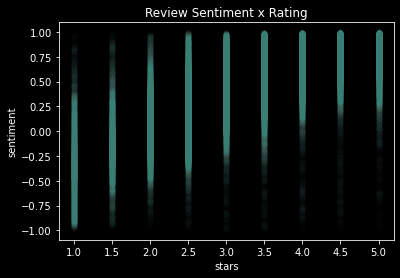

In [75]:
from matplotlib import pyplot as plt

plt.style.use(["dark_background"])
plt.scatter(dfa.stars, dfa.average_review_sentiment,alpha=0.01)
plt.title('Review Sentiment x Rating')
plt.xlabel('stars')
plt.ylabel('sentiment')
plt.show()

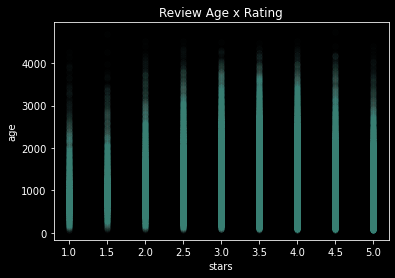

In [76]:
plt.scatter(dfa.stars, dfa.average_review_age,alpha=0.01)
plt.title('Review Age x Rating')
plt.xlabel('stars')
plt.ylabel('age')
plt.show()

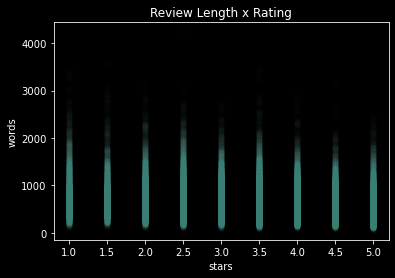

In [77]:
plt.scatter(dfa.stars, dfa.average_review_length,alpha=0.01)
plt.title('Review Length x Rating')
plt.xlabel('stars')
plt.ylabel('words')
plt.show()

### Data Selection 
* sentiments correlation is logical, so we'll train the model on the other two features

In [78]:
features = dfa[['average_review_length', 'average_review_age']]
ratings = dfa['stars']

### Model Training and Testing

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, ratings, 
                                                    test_size = 0.2, random_state = 1)

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [82]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.08250309566544889
0.08083081210060561


In [83]:
y_predicted = model.predict(X_test)

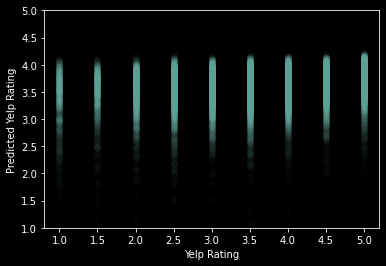

In [90]:
plt.scatter(y_test,y_predicted, alpha = 0.02)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)
plt.show()

In [91]:
sentiment = ['average_review_sentiment']
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids',
                   'take_reservations','has_wifi']
numeric_features = ['review_count','price_range','average_caption_length','number_pics',
                    'average_review_age','average_review_length','average_review_sentiment',
                    'number_funny_votes','number_cool_votes','number_useful_votes',
                    'average_tip_length','number_tips','average_number_friends',
                    'average_days_on_yelp','average_number_fans','average_review_count',
                    'average_number_years_elite','weekday_checkins','weekend_checkins']

In [94]:
import numpy as np

def model_features(feature_list):
    features = dfa.loc[:,feature_list]
    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, 
                                                        random_state = 1)
    
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    y_predicted = model.predict(X_test)
    
    plt.scatter(y_test,y_predicted, alpha = 0.02)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492


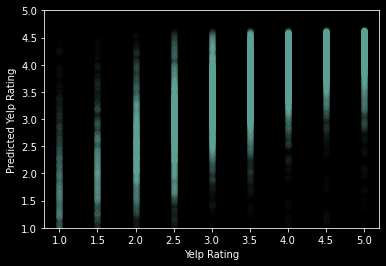

In [95]:
model_features(sentiment)

Train Score: 0.673499259376666
Test Score: 0.6713318798120138


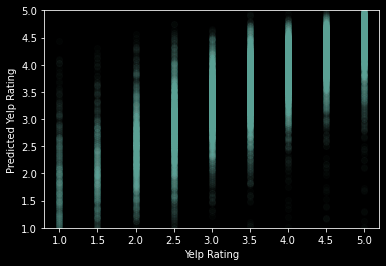

In [97]:
model_features(numeric_features)